In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
con = sqlite3.connect(r'C:\Users\BEYAZAY\OneDrive - UNHCR\Desktop\Masaustum\Veri Bilimi\Zomato_Resources\zomato_rawdata.sqlite')

In [3]:
df = pd.read_sql_query("SELECT * FROM USERS", con)

In [4]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [5]:
df['approx_cost(for two people)'].str.replace(',', '')

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [6]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [7]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [8]:
df['rate'] = df['rate'].astype(str)

In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', 'None', '2.6/5', '3.8 /5',
       '3.4/5', '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5',
       '2.3/5', '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5',
       '4.0 /5', '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5',
       '2.8 /5', '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5',
       '4.5 /5', '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5',
       '4.6 /5', '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5',
       '2.4 /5', '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
df['rate'].replace('NEW', np.nan, inplace=True)
df['rate'].replace('None', np.nan, inplace=True)
df['rate'].replace('-', np.nan, inplace=True)

C:\Users\BEYAZAY\AppData\Local\Temp\ipykernel_19016\252746159.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace('NEW', np.nan, inplace=True)
C:\Users\BEYAZAY\AppData\Local\Temp\ipykernel_19016\252746159.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [11]:
df['rate'].isnull().sum()

10052

In [12]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [13]:
df['rest_type'].isnull().sum()
df.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [14]:
data = df.dropna(subset=['rest_type'])
data.shape

(51490, 18)

In [15]:
data_qb = data[data['rest_type'].str.contains('Quick Bites')]

In [16]:
data_qb.shape

(20639, 18)

In [17]:
data_qb['dish_liked'].str.lower()

3                                              masala dosa
23                                         pasta, iced tea
26                                                    None
31       burgers, lassi, chicken grill, naan, momos, ch...
34       rolls, veggie wrap, chocolate fantasy, rice bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              burgers
Name: dish_liked, Length: 20639, dtype: object

In [18]:
all_dishes = data_qb['dish_liked'].str.lower().str.cat()

In [19]:
import wordcloud

In [20]:
from wordcloud import WordCloud

In [21]:
wordcloud = WordCloud().generate(all_dishes)

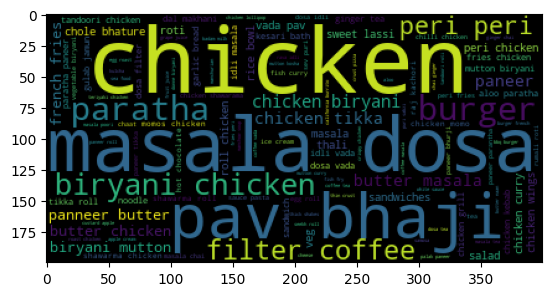

In [22]:
plt.imshow(wordcloud)

In [23]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [24]:
df[df['rate'].isnull()].index

Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,   114,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=10052)

In [25]:
df['rate'][72]

nan

In [26]:
df['reviews_list'][72]

"[('Rated 4.0', 'RATED\\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'), ('Rated 5.0', 'RATED\\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]"

In [27]:
import ast

In [28]:
first_input = ast.literal_eval(df['reviews_list'][72])[0]

In [29]:
first_input

('Rated 4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served')

In [30]:
[i.replace('Rated', '').strip() for i in first_input][0]

'4.0'

In [31]:
float([i.replace('Rated', '').strip() for i in first_input][0])

4.0

In [32]:
def get_Rate(x):
    list_of_reviews = ast.literal_eval(x)
    if list_of_reviews is None or len(list_of_reviews)<=1:
        return None

    else:
        first_input = list_of_reviews[0]
        rate = float([i.replace('Rated', '').strip() for i in first_input][0])
        return rate

In [33]:
df['rate_from_review_list']= df['reviews_list'].apply(get_Rate)

In [34]:
get_Rate(df['reviews_list'][72])

4.0

In [35]:
df['rate_from_review_list']

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51712    5.0
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: rate_from_review_list, Length: 51717, dtype: float64

In [36]:
nan_index = df[df['rate'].isnull()].index

In [37]:
df['rate'][72] = df['rate_from_review_list'][72]

C:\Users\BEYAZAY\AppData\Local\Temp\ipykernel_19016\4167601169.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['rate'][72] = df['rate_from_review_list'][72]
C:\Users\BEYAZAY\AppData\Local\Temp\ipykernel_19016\4167601169.py:1: SettingW

In [38]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [39]:
nan_index = df[df['rate'].isnull()].index

In [40]:
nan_index

Index([   75,    84,    90,    91,    92,   107,   110,   113,   114,   115,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=10051)

In [41]:
for index in nan_index:
    df['rate'][index] =df['rate_from_review_list'][index]

In [42]:
df['rate'].isnull().sum()

8542

In [43]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            8542
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rate_from_review_list          16120
dtype: int64

In [44]:
df.columns
dataframe =df.drop(['dish_liked', 'rate_from_review_list'], axis=1)

In [45]:
dataframe.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [46]:
data['rest_type']
dataframe['cuisines'][0].split(',')
len(dataframe['cuisines'][0].split(','))
def count(row):
    return len(row.split(','))

dataframe['total_cuisines']=dataframe['cuisines'].astype(str).apply(count)
dataframe['multiple_types']=dataframe['rest_type'].astype(str).apply(count)

In [47]:
dataframe.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2,1


In [48]:
threshold = 3.80
dataframe['rate'] = dataframe['rate'].astype(str)
dataframe['rate'] = dataframe['rate'].str.replace('/5', '')

dataframe['rate'] = dataframe['rate'].astype(float)

dataframe['target']= dataframe['rate'].apply(lambda x: 1 if x>=threshold else 0)


In [49]:
dataframe.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types,target
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1


In [50]:
dataframe = dataframe.dropna()
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

In [51]:
imp_features = ['online_order', 'book_table',
                'votes','location', 'rest_type',
                'approx_cost(for two people)',
               'listed_in(type)', 'listed_in(city)', 'target']

In [52]:
data =dataframe[imp_features]

In [53]:
data.shape

(42144, 9)

In [54]:
cat_features = [col for col in data.columns if data[col].dtype=='O']

In [55]:
num_features = [col for col in data.columns if data[col].dtype!='O']

In [56]:
data['online_order'].nunique()

2

In [57]:
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
approx_cost(for two people) has total 63 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [58]:
freq_cat = data['rest_type'].value_counts()[0:5]/len(data)*100
data[data['rest_type'].isin(freq_cat.index)]

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,775,Banashankari,Casual Dining,800,Buffet,Banashankari,1
1,Yes,No,787,Banashankari,Casual Dining,800,Buffet,Banashankari,1
3,No,No,88,Banashankari,Quick Bites,300,Buffet,Banashankari,0
4,No,No,166,Basavanagudi,Casual Dining,600,Buffet,Banashankari,1
5,Yes,No,286,Basavanagudi,Casual Dining,600,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...
51632,No,No,4,KR Puram,Quick Bites,350,Dine-out,Whitefield,0
51634,No,No,34,Brookefield,Quick Bites,200,Dine-out,Whitefield,0
51635,No,No,7,KR Puram,Quick Bites,400,Dine-out,Whitefield,0
51640,No,No,31,KR Puram,Quick Bites,400,Dine-out,Whitefield,0


In [59]:
data['rest_type'] = data['rest_type'].apply(lambda x: 'other' if x not in freq_cat.index else x)
data['rest_type']

0        Casual Dining
1        Casual Dining
2                other
3          Quick Bites
4        Casual Dining
             ...      
51709            other
51711            other
51712            other
51715            other
51716            other
Name: rest_type, Length: 42144, dtype: object

In [60]:
pd.get_dummies(data['online_order'], prefix='online_order', drop_first=True)

,online_order_Yes
0,True
1,True
2,True
3,False
4,False
...,...
51709,False
51711,False
51712,False
51715,False


In [61]:
for col in ['online_order', 'book_table', 'rest_type', 'listed_in(type)']:
    col_encoded = pd.get_dummies(data[col], prefix=col, drop_first=True)
    data = pd.concat([data, col_encoded], axis=1)


In [62]:
data.head(4)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,Banashankari,Casual Dining,800,Buffet,Banashankari,1,True,...,False,False,False,False,False,False,False,False,False,False
1,Yes,No,787,Banashankari,Casual Dining,800,Buffet,Banashankari,1,True,...,False,False,False,False,False,False,False,False,False,False
2,Yes,No,918,Banashankari,other,800,Buffet,Banashankari,1,True,...,False,False,False,True,False,False,False,False,False,False
3,No,No,88,Banashankari,Quick Bites,300,Buffet,Banashankari,0,False,...,False,False,True,False,False,False,False,False,False,False


In [63]:
dict_mean_location = data.groupby(['location'])['target'].mean().to_dict()


In [64]:
data['location'] = data['location'].map(dict_mean_location)

In [65]:
dict_mean_city = data.groupby(['listed_in(city)'])['target'].mean().to_dict()
data['listed_in(city)'] = data['listed_in(city)'].map(dict_mean_city)
data['listed_in(city)']

0        0.482993
1        0.482993
2        0.482993
3        0.482993
4        0.482993
           ...   
51709    0.406986
51711    0.406986
51712    0.406986
51715    0.406986
51716    0.406986
Name: listed_in(city), Length: 42144, dtype: float64

In [66]:
data.drop(['online_order', 'book_table', 'rest_type', 'listed_in(type)'], axis=1, inplace=True)

In [67]:
data.tail(2)

,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
51715,236,0.32967,"2,500",0.406986,1,False,True,False,False,False,False,True,False,False,False,False,False,True
51716,13,0.32967,"1,500",0.406986,0,False,False,False,False,False,False,True,False,False,False,False,False,True


In [68]:
data.dtypes

votes                                   int64
location                              float64
approx_cost(for two people)            object
listed_in(city)                       float64
target                                  int64
online_order_Yes                         bool
book_table_Yes                           bool
rest_type_Casual Dining                  bool
rest_type_Delivery                       bool
rest_type_Dessert Parlor                 bool
rest_type_Quick Bites                    bool
rest_type_other                          bool
listed_in(type)_Cafes                    bool
listed_in(type)_Delivery                 bool
listed_in(type)_Desserts                 bool
listed_in(type)_Dine-out                 bool
listed_in(type)_Drinks & nightlife       bool
listed_in(type)_Pubs and bars            bool
dtype: object

In [69]:
data['approx_cost(for two people)']= data['approx_cost(for two people)'].apply(str).str.replace(',','')
data['approx_cost(for two people)']= (data['approx_cost(for two people)']).astype(float)

In [70]:
data.dtypes

votes                                   int64
location                              float64
approx_cost(for two people)           float64
listed_in(city)                       float64
target                                  int64
online_order_Yes                         bool
book_table_Yes                           bool
rest_type_Casual Dining                  bool
rest_type_Delivery                       bool
rest_type_Dessert Parlor                 bool
rest_type_Quick Bites                    bool
rest_type_other                          bool
listed_in(type)_Cafes                    bool
listed_in(type)_Delivery                 bool
listed_in(type)_Desserts                 bool
listed_in(type)_Dine-out                 bool
listed_in(type)_Drinks & nightlife       bool
listed_in(type)_Pubs and bars            bool
dtype: object

In [71]:
data['online_order_Yes'] = data['online_order_Yes'].astype('uint8')
data['book_table_Yes'] = data['book_table_Yes'].astype('uint8')
data['rest_type_Casual Dining'] = data['rest_type_Casual Dining'].astype('uint8')
data['rest_type_Delivery'] = data['rest_type_Delivery'].astype('uint8')
data['rest_type_Quick Bites'] = data['rest_type_Quick Bites'].astype('uint8')
data['rest_type_Dessert Parlor'] = data['rest_type_Dessert Parlor'].astype('uint8')
data['rest_type_other'] = data['rest_type_other'].astype('uint8')
data['listed_in(type)_Cafes'] = data['listed_in(type)_Cafes'].astype('uint8')
data['listed_in(type)_Delivery'] = data['listed_in(type)_Delivery'].astype('uint8')
data['listed_in(type)_Desserts'] = data['listed_in(type)_Desserts'].astype('uint8')
data['listed_in(type)_Dine-out'] = data['listed_in(type)_Dine-out'].astype('uint8')
data['listed_in(type)_Drinks & nightlife'] = data['listed_in(type)_Drinks & nightlife'].astype('uint8')
data['listed_in(type)_Pubs and bars'] = data['listed_in(type)_Pubs and bars'].astype('uint8')

In [72]:
data.dtypes

votes                                   int64
location                              float64
approx_cost(for two people)           float64
listed_in(city)                       float64
target                                  int64
online_order_Yes                        uint8
book_table_Yes                          uint8
rest_type_Casual Dining                 uint8
rest_type_Delivery                      uint8
rest_type_Dessert Parlor                uint8
rest_type_Quick Bites                   uint8
rest_type_other                         uint8
listed_in(type)_Cafes                   uint8
listed_in(type)_Delivery                uint8
listed_in(type)_Desserts                uint8
listed_in(type)_Dine-out                uint8
listed_in(type)_Drinks & nightlife      uint8
listed_in(type)_Pubs and bars           uint8
dtype: object

In [73]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\BEYAZAY\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [74]:
import seaborn as sns

In [75]:
data['approx_cost(for two people)']= data['approx_cost(for two people)'].apply(str).str.replace(',','')
data['approx_cost(for two people)']= (data['approx_cost(for two people)']).astype(float)


In [76]:
data['approx_cost(for two people)'] = np.log1p(data['approx_cost(for two people)'])


In [77]:
data['approx_cost(for two people)']

0        6.685861
1        6.685861
2        6.685861
3        5.707110
4        6.398595
           ...   
51709    6.685861
51711    6.685861
51712    7.313887
51715    7.824446
51716    7.313887
Name: approx_cost(for two people), Length: 42144, dtype: float64

In [78]:
data.columns

Index(['votes', 'location', 'approx_cost(for two people)', 'listed_in(city)',
       'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Casual Dining', 'rest_type_Delivery',
       'rest_type_Dessert Parlor', 'rest_type_Quick Bites', 'rest_type_other',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars'],
      dtype='object')

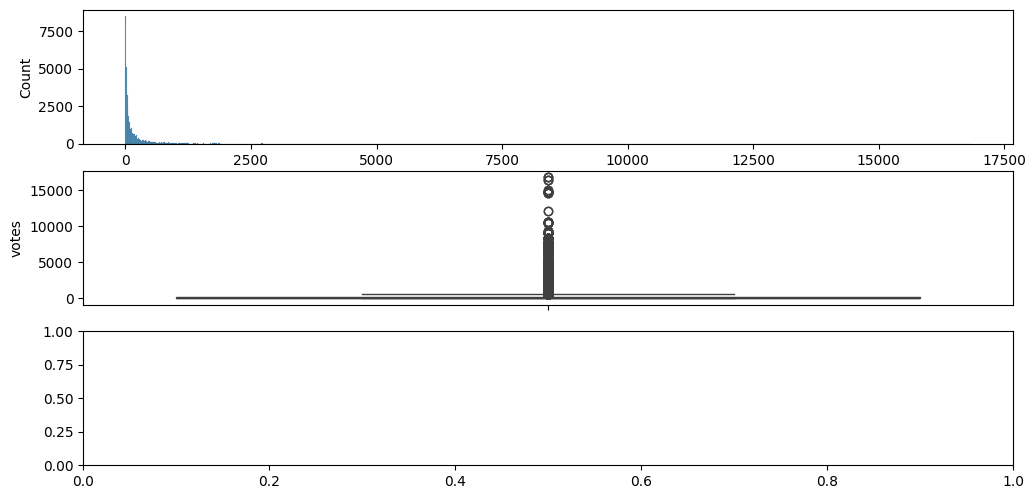

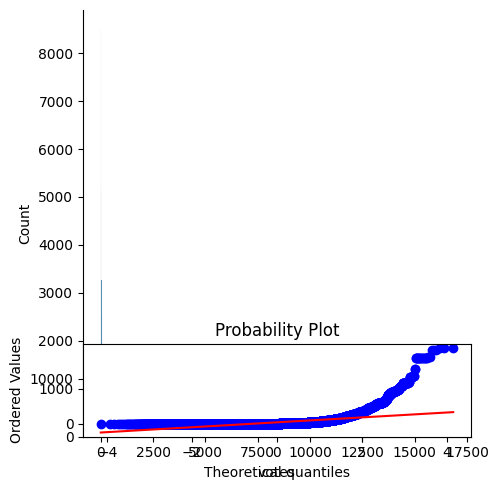

In [79]:
from scipy import stats

plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
sns.boxplot(data['votes'])

plt.subplot(413)
sns.displot(data['votes'])

plt.subplot(414)
stats.probplot(data['votes'], plot=plt)

plt.show()

In [80]:
data['votes'] = np.log1p(data['votes'])
data['votes']

0        6.654153
1        6.669498
2        6.823286
3        4.488636
4        5.117994
           ...   
51709    3.555348
51711    4.406719
51712    3.332205
51715    5.468060
51716    2.639057
Name: votes, Length: 42144, dtype: float64

In [81]:
data.head()

,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,6.654153,0.477124,6.685861,0.482993,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,6.669498,0.477124,6.685861,0.482993,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,6.823286,0.477124,6.685861,0.482993,1,1,0,0,0,0,0,1,0,0,0,0,0,0
3,4.488636,0.477124,5.707110,0.482993,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5.117994,0.523333,6.398595,0.482993,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [88]:
X=data.drop('target', axis=1)
y=data['target']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [94]:
X_train.shape

(31608, 17)

In [95]:
data.shape

(42144, 18)

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf_model = RandomForestClassifier()

In [102]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
predictions = rf_model.predict(X_test)

In [106]:
predictions

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [110]:
accuracy_score(predictions, y_test)

0.9141989369779803

In [112]:
confusion_matrix(predictions, y_test)

array([[4965,  462],
       [ 442, 4667]], dtype=int64)

In [114]:
RandomForestClassifier()

RandomForestClassifier()

In [125]:
n_estimators = [int(x) for x in np.linspace(100, 1200, num=3)]

max_features = ["auto","sqrt"]

max_depth = [int(x) for x in np.linspace(5, 30, num=3)]

min_samples_split = [5, 10, 100]

In [147]:
random_grid = {
    'n_estimators':[100, 650, 1200],
    'max_features': ['auto','sqrt'],
    'max_depth': [5, 17, 30],
    'min_samples_split': [5, 10, 100]}

In [148]:
from sklearn.model_selection import RandomizedSearchCV

In [149]:
estimator = RandomForestClassifier()

In [150]:
rf_random = RandomizedSearchCV(estimator = estimator, param_distributions = random_grid, cv=2, verbose=2, n_jobs=-1)

In [151]:
rf_random.fit(X_train, y_train)


Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 17, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 100],
                                        'n_estimators': [100, 650, 1200]},
                   verbose=2)

In [152]:
rf_random.best_params_

{'n_estimators': 650,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 17}

In [153]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=17, min_samples_split=5, n_estimators=650)

In [154]:
rf_opt = RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5, n_estimators=650)

In [155]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=650)

In [157]:
predictions_opt = rf_opt.predict(X_test,)

In [158]:
predictions_opt

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [160]:
accuracy_score(predictions_opt, y_test)

0.9091685649202733